# **Statistic Project**

**Name - StudentID:**

Huỳnh Trần Quốc Huy - 22520544

Nguyễn Vũ Khê - 22520662



# **Part 1: Common Items**

## **Import library**

In [ ]:
import requests
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import ipywidgets as widgets
import seaborn as sns
from IPython.display import display
import scipy.stats as stats
from ipywidgets import interact, interactive
from IPython.display import clear_output

## **Import Dataset**

Import Starbucks financial report dataset.

- Download fie SB_FR.csv and upload it to file in google colab then run the code bellow

 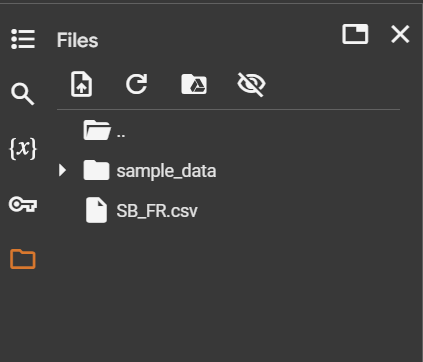


The dataframe df will store the data

In [ ]:
df = pd.read_csv("SB_FR.csv", sep=",")
#Make sure data input change from ',' to '.'
df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
#df['Operating Margin (%)'] = df['Operating Margin (%)'].astype(str).str.replace('%', '').astype(float) / 100
df

<ipython-input-27-5d5f482a4dfa>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


,Day,Company-operated,Licensed stored,"CPG, foodservice and other",Total net revenues,Total Operating Expenses,Income from equity investees,Operating income,Total Assets,ROA,Total equity,ROE,ROE change,Operating Margin (%),GDP
0,30/12/2012,2989.6,350.2,459.8,3799.6,3223.5,54.5,630.6,8490.1,7.43%,5169.3,12.20%,NaN,16.60%,55859
1,31/03/2013,2807.7,322.1,426.1,3555.9,3064.3,52.5,544.1,8502.8,6.40%,5327.5,10.21%,-1.99%,15.30%,55914
2,30/06/2013,2986.3,342.0,413.4,3741.7,3189.9,63.4,615.2,9062.4,6.79%,5747.6,10.70%,0.49%,16.40%,56272
3,29/09/2013,3009.6,346.3,439.1,3795.0,3207.1,81.0,668.9,11516.7,5.81%,4480.2,14.93%,4.23%,17.60%,56642
4,29/12/2013,3343.8,401.8,494.0,4239.6,3477.2,51.1,813.5,10255.2,7.93%,4889.5,16.64%,1.71%,19.20%,56345
5,30/03/2014,3068.0,356.2,449.6,3873.8,3289.6,59.9,644.1,10097.0,6.38%,4947.1,13.02%,-3.62%,16.60%,56968
6,29/06/2014,3290.5,408.1,455.1,4153.7,3458.1,72.9,768.5,10385.3,7.40%,5070.8,15.16%,2.14%,18.50%,57536
7,28/09/2014,3275.7,422.6,482.5,4180.8,3410.3,84.4,854.9,10752.9,7.95%,5272.0,16.22%,1.06%,20.40%,57702
8,28/12/2014,3772.8,483.9,546.5,4803.2,3940.5,52.8,915.5,12351.1,7.41%,6157.8,14.87%,-1.35%,19.10%,58121
9,29/03/2015,3622.9,421.3,519.3,4563.5,3840.9,54.9,777.5,12190.7,6.38%,6010.7,12.94%,-1.93%,17.00%,58376


Import Starbucks store dataset
- Do the same with SB_Store.csv

In [ ]:
df2 = pd.read_csv("SB_Store.csv", sep=",")
df2

,Quarter,Day,ACO,AL,ICO,IL,TCO,TL,Total,CACO,CAL,CICO,CIL,CCO,CL,Total culummative store
0,1,30/12/2012,30,50,27,105,57,155,212,7887,5096,1575,3720,9462,8816,18278
1,2,31/03/2013,25,70,368,127,393,197,590,7895,5100,1960,3913,9855,9013,18868
2,3,30/06/2013,63,95,76,107,139,202,341,7958,5195,2036,4020,9994,9215,19209
3,4,29/09/2013,164,176,80,138,244,314,558,8078,5415,2116,4158,10194,9573,19767
4,1,29/12/2013,27,115,71,204,98,319,417,8105,5530,2187,4362,10292,9892,20184
5,2,30/03/2014,59,69,58,149,117,218,335,8164,5599,2230,4526,10394,10125,20519
6,3,29/06/2014,69,80,52,143,121,223,344,8233,5679,2282,4669,10515,10348,20863
7,4,28/09/2014,162,117,72,152,234,269,503,8395,5796,2318,4857,10713,10653,21366
8,1,28/12/2014,67,143,1073,-771,1140,-628,512,8462,5939,3391,4086,11853,10025,21878
9,2,29/03/2015,52,-54,50,162,102,108,210,8514,5885,3441,4248,11955,10133,22088


## 1.1. Calculate central tendency measures

- This helps you calculate the mean, median, and mode.

- For calculating the mode, numbers will be rounded to the nearest hundred (or unit) to simplify calculations.

- Run the code, and a selection box will appear. Choose the column you want to calculate, and the result will be displayed.

In [ ]:
# Dropdown for selecting the column
central_tendency_column_selector = widgets.Dropdown(
    options=df.columns,
    description='Select column:',
    disabled=False
)

# Function to calculate central tendency measures
def calculate_central_tendency(column_name):
    df[f"Rounded_{column_name}"] = df[column_name].round(-1)

    # Calculate mean and median from the original column
    mean = df[column_name].mean()
    median = df[column_name].median()

    # Calculate mode from the rounded column
    mode = df[f"Rounded_{column_name}"].mode()[0] if not df[f"Rounded_{column_name}"].mode().empty else None


    print(f"Central Tendency Measures for {column_name}:")
    print(f"Mean: {mean}")
    print(f"Median: {median}")
    print(f"Mode: {mode}")

# Callback function for dropdown
def on_central_tendency_column_change(change):
    selected_column = change.new
    calculate_central_tendency(selected_column)

# Observe dropdown change
central_tendency_column_selector.observe(on_central_tendency_column_change, names='value')

# Display dropdown
display(central_tendency_column_selector)

Dropdown(description='Select column:', options=('Day', 'Company-operated', 'Licensed stored', 'CPG, foodservic…

## 1.2. Calculate dispersion measures

- This helps you calculate the range, variance and standard deviation.

- Run the code, and a selection box will appear. Choose the column you want to calculate, and the result will be displayed.

In [ ]:
# Dropdown for selecting the column
dispersion_column_selector = widgets.Dropdown(
    options=df.columns,
    description='Select column:',
    disabled=False
)

# Function to calculate dispersion measures
def calculate_dispersion(column_name):
    data = df[column_name]
    data_range = data.max() - data.min()
    variance = data.var()
    std_dev = data.std()

    print(f"Dispersion Measures for {column_name}:")
    print(f"Range: {data_range}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")

# Callback function for dropdown
def on_dispersion_column_change(change):
    selected_column = change.new
    calculate_dispersion(selected_column)

# Observe dropdown change
dispersion_column_selector.observe(on_dispersion_column_change, names='value')

# Display dropdown
display(dispersion_column_selector)

Dropdown(description='Select column:', options=('Day', 'Company-operated', 'Licensed stored', 'CPG, foodservic…

##1.3. Draw diagrams

### BoxPlot, Histogram, Scatter Plot

In [ ]:
# Dropdowns for selecting columns
visualization_column_selector = widgets.Dropdown(
    options=df.columns,
    description='Select column:',
    disabled=False
)

scatter_column_selector = widgets.Dropdown(
    options=[None] + list(df.columns),  # Thêm tùy chọn None
    description='Select second column for scatter plot:',
    disabled=False
)

# Function to generate visualizations
def draw_visualizations(column_name, second_column_name=None):
    clear_output(wait=True)  # Làm sạch đầu ra trước khi vẽ mới
    display(visualization_column_selector)
    display(scatter_column_selector)

    plt.figure(figsize=(10, 6))

    # Histogram
    sns.histplot(x=df[column_name], kde=True)
    plt.title(f"Histogram of {column_name}")
    plt.ylabel("Count")
    plt.xlabel(column_name)
    plt.show()

    # Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[column_name], orient="v")
    plt.title(f"Box Plot of {column_name}")
    plt.ylabel(column_name)
    plt.show()

    # Scatter Plot (if second column selected)
    if second_column_name:
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=df[second_column_name], y=df[column_name])
        plt.title(f"Scatter Plot of {column_name} vs {second_column_name}")
        plt.xlabel(second_column_name)
        plt.ylabel(column_name)
        plt.show()

# Callback function for visualization
def on_visualization_column_change(change):
    selected_column = visualization_column_selector.value
    second_column = scatter_column_selector.value
    draw_visualizations(selected_column, second_column)

# Observe dropdown change
visualization_column_selector.observe(on_visualization_column_change, names='value')
scatter_column_selector.observe(on_visualization_column_change, names='value')

# Display dropdowns
display(visualization_column_selector)
display(scatter_column_selector)


Dropdown(description='Select column:', options=('Day', 'Company-operated', 'Licensed stored', 'CPG, foodservic…

Dropdown(description='Select second column for scatter plot:', options=(None, 'Day', 'Company-operated', 'Lice…

### Line chart - one value

Change File name in first row to change your data set want to draw line chart

In [ ]:
data = pd.read_csv("SB_FR.csv", sep=",")


for col in data.select_dtypes(include=['object']).columns:
    try:
        data[col] = pd.to_datetime(data[col])
    except:
        pass

# Widget để chọn cột ngày
date_column_selector = widgets.Dropdown(
    options=[col for col in data.columns if pd.api.types.is_datetime64_any_dtype(data[col])],
    description='Cột Ngày:',
    style={'description_width': 'initial'}
)

# Widget để chọn cột giá trị
value_column_selector = widgets.Dropdown(
    options=data.columns,
    description='Cột Giá Trị:',
    style={'description_width': 'initial'}
)

# Nút để vẽ biểu đồ
plot_button = widgets.Button(description='Vẽ Biểu Đồ')

# Hàm vẽ biểu đồ
def plot_line_chart(button):
    date_column = date_column_selector.value
    value_column = value_column_selector.value

    if date_column and value_column:
        # Sắp xếp dữ liệu theo cột ngày
        data_sorted = data.sort_values(by=date_column)

        # Vẽ biểu đồ
        plt.figure(figsize=(12, 6))
        plt.plot(data_sorted[date_column], data_sorted[value_column], marker='o', linestyle='-', color='blue', label=value_column)

        # Định dạng biểu đồ
        plt.title(f'{value_column} over Time', fontsize=16)
        plt.xlabel('Date', fontsize=12)
        plt.ylabel(value_column, fontsize=12)
        plt.xticks(rotation=45)  # Xoay nhãn trục X
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend(fontsize=12)
        plt.tight_layout()

        # Hiển thị biểu đồ
        plt.show()
    else:
        print("Vui lòng chọn đầy đủ cột Ngày và cột Giá Trị!")

# Gán sự kiện nhấn nút
plot_button.on_click(plot_line_chart)

# Hiển thị widget
display(date_column_selector, value_column_selector, plot_button)

<ipython-input-32-737bedb1827b>:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[col] = pd.to_datetime(data[col])
<ipython-input-32-737bedb1827b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
<ipython-input-32-737bedb1827b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])
<ipython-input-32-737bedb1827b>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetim

Dropdown(description='Cột Ngày:', options=('Day',), style=DescriptionStyle(description_width='initial'), value…

Dropdown(description='Cột Giá Trị:', options=('Day', 'Company-operated', 'Licensed stored', 'CPG, foodservice …

Button(description='Vẽ Biểu Đồ', style=ButtonStyle())

### Line chart _ two value

In [ ]:
from ipywidgets import Dropdown, Output, VBox
data_r = pd.read_csv("SB_Store.csv", sep=",")

# Tạo cột "Year-Quarter" nếu chưa có
data_r['Year'] = (data.index // 4) + 2013  # Bắt đầu từ năm 2013
data_r['Year-Quarter'] = data_r['Year'].astype(str) + '-Q' + data_r['Quarter'].astype(str)  # Kết hợp năm và quý

# Tạo output widget để hiển thị biểu đồ
output = Output()

# Hàm vẽ biểu đồ line chart với từng quý
def plot_line_chart(col1, col2):
    with output:
        output.clear_output()
        plt.figure(figsize=(12, 6))

        # Lấy dữ liệu
        x_labels = data_r['Year-Quarter']  # Trục x là Year-Quarter
        y1 = df2[col1]
        y2 = df2[col2]

        # Vẽ dữ liệu
        plt.plot(x_labels, y1, label=col1, marker='o', linestyle='-')
        plt.plot(x_labels, y2, label=col2, marker='x', linestyle='--')

        # Thiết lập biểu đồ
        plt.title(f"Line Chart of {col1} vs {col2} (Quarterly Data)", fontsize=14)
        plt.xlabel("Year-Quarter", fontsize=12)
        plt.ylabel("Number of Stores", fontsize=12)
        plt.legend(fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.xticks(rotation=45, fontsize=10)  # Xoay nhãn để dễ đọc
        plt.tight_layout()
        plt.show()

# Dropdown để chọn cột
col_options = data_r.columns.tolist()
dropdown1 = Dropdown(options=col_options, description="Column 1:")
dropdown2 = Dropdown(options=col_options, description="Column 2:")

# Hàm cập nhật biểu đồ khi người dùng thay đổi lựa chọn
def update_chart(change):
    plot_line_chart(dropdown1.value, dropdown2.value)

# Kết nối sự kiện
dropdown1.observe(update_chart, names='value')
dropdown2.observe(update_chart, names='value')

# Hiển thị giao diện
ui = VBox([dropdown1, dropdown2, output])
display(ui)

# Vẽ biểu đồ mặc định
plot_line_chart(dropdown1.value, dropdown2.value)

##1.4. Perform hypothesis testing
-  this part will perform T-Test, Chi-Square test and calculate Confidence Interval
- the hypothesis testing will base on p-value, p < 0.05 will reject the null Hypothesis

In [ ]:
# Tạo Dropdown để chọn phương pháp kiểm định
test_selector = widgets.Dropdown(
    options=['T-Test', 'Chi-Square', 'Confidence Interval'],
    description='Test Type:',
    disabled=False
)

# Tạo Dropdown để chọn cột cho t-test
column_selector = widgets.Dropdown(
    options=df.columns,
    description='Choose column:',
    disabled=False
)

# Tạo Dropdown cho chi-square test để chọn hai cột phân loại
column_selector_2 = widgets.Dropdown(
    options=df.columns,
    description='Choose second column (Chi-Square):',
    disabled=False
)

# Hàm thực hiện t-test
def perform_t_test(col1):
    data1 = df[col1].dropna()
    # Giả sử kiểm định t-test với một giá trị trung bình 0
    t_stat, p_value = stats.ttest_1samp(data1, 0)

    print(f"T-Test for {col1}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    print("Reject null hypothesis" if p_value < 0.05 else "Fail to reject null hypothesis")

# Hàm thực hiện chi-square test
def perform_chi_square(col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"Chi-Square Test for {col1} and {col2}:")
    print(f"Chi-Square statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print("Reject null hypothesis" if p_value < 0.05 else "Fail to reject null hypothesis")

# Hàm xây dựng khoảng tin cậy
def perform_confidence_interval(col1):
    data = df[col1].dropna()
    confidence_level = 0.95
    mean = data.mean()
    std_error = stats.sem(data)
    interval = stats.t.interval(confidence_level, len(data)-1, loc=mean, scale=std_error)

    print(f"Confidence Interval for {col1}:")
    print(f"Confidence Interval: {interval}")

# Hàm điều khiển logic
def on_test_selected(change):
    selected_test = change.new
    if selected_test == 'T-Test':
        print("Performing T-Test...")
        perform_t_test(column_selector.value)
    elif selected_test == 'Chi-Square':
        print("Performing Chi-Square Test...")
        perform_chi_square(column_selector.value, column_selector_2.value)
    elif selected_test == 'Confidence Interval':
        print("Performing Confidence Interval...")
        perform_confidence_interval(column_selector.value)

# Set event for test selection
test_selector.observe(on_test_selected, names='value')

# Hiển thị các widget
display(test_selector)
display(column_selector)
display(column_selector_2)

Dropdown(description='Test Type:', options=('T-Test', 'Chi-Square', 'Confidence Interval'), value='T-Test')

Dropdown(description='Choose column:', options=('Day', 'Company-operated', 'Licensed stored', 'CPG, foodservic…

Dropdown(description='Choose second column (Chi-Square):', options=('Day', 'Company-operated', 'Licensed store…

# Part 2:  Specific Items

## 2.1. Regression Statistic

Import the dataset/merge two datasets on 'Day.'

Select the independent variable columns for X and the dependent variable for Y.

In [ ]:
# Merge two dataset on "Date"
merged_df = pd.merge(df, df2, on="Day")


X = merged_df[['Total Operating Expenses', 'TCO', 'TL', 'Total culummative store', 'GDP']]

y = merged_df['Total net revenues']


### 2.1.1. Perform regression
This will:

- Calculate the regression model
- Use 80% of the data to train the model and 20% to test it
- Calculate the intercept

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)

# Print the model's coefficients and intercept
print("Regression coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict with the test set and print a sample of predictions
y_pred = model.predict(X_test)
print("Model predictions (sample):", y_pred[:5])  # Print the first 5 predictions


Regression coefficients: [ 1.61086061  0.60079646  0.64050425 -0.14717954  0.05592659]
Intercept: -1825.5047124168577
Model predictions (sample): [6811.82128903 8885.54970817 6787.78808069 9442.58283776 6736.02895566]


### 2.1.2. Calculate R square and Mean Absolute Error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R^2 Score:", r2)


Mean Absolute Error: 100.06114567054428
R^2 Score: 0.9865570760121375


### 2.1.3. Regression Function

In [ ]:
# Get intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Create the regression equation
equation = f"y = {intercept:.8f}"
for i, coef in enumerate(coefficients):
    equation += f" + ({coef:.8f} * X{i+1})"  # X1, X2, ... are the independent variables

print("Linear regression equation:")
print(equation)

Linear regression equation:
y = -1825.50471242 + (1.61086061 * X1) + (0.60079646 * X2) + (0.64050425 * X3) + (-0.14717954 * X4) + (0.05592659 * X5)


## 2.2. ARIMA Model

### 2.2.1. Import library for ARIMA calculate

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

### 2.2.2. Build and apply an ARIMA model


In [ ]:
# Load data
data = pd.read_csv('SB_FR.csv', parse_dates=['Day'], index_col='Day')

# Create dropdown widget for column selection
column_dropdown = widgets.Dropdown(
    options=data.columns,
    description='Select Column:',
    style={'description_width': 'initial'}
)

# Function to run ARIMA model based on selected column
def run_arima(column_name):
    clear_output(wait=True)
    print(f"Running ARIMA model for column: {column_name}")

    # Extract the selected column
    time_series = data[column_name].dropna()

    # Plot the selected time series
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, color='blue')
    plt.title(f'{column_name} over Time')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.show()

    # Check stationarity with ADF test
    result = adfuller(time_series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])

    # Differencing if needed
    if result[1] > 0.05:
        print(f"The {column_name} series is non-stationary, differencing is needed.")
        time_series = time_series.diff().dropna()
    else:
        print(f"The {column_name} series is stationary, no differencing needed.")

    # Plot ACF and PACF
    plot_acf(time_series)
    plt.show()
    plot_pacf(time_series)
    plt.show()

    # Set ARIMA order based on ACF and PACF (for example, p=1, d=1, q=1)
    p, d, q = 1, 1, 1
    model = ARIMA(time_series, order=(p, d, q))
    arima_model = model.fit()

    # Print model summary
    print(f"ARIMA model summary for {column_name}:")
    print(arima_model.summary())

    # Forecast future values
    forecast_steps = 8  # Number of quarters to forecast
    forecast = arima_model.get_forecast(steps=forecast_steps)
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Plot forecast results
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label=f'Actual {column_name}')
    forecast_index = pd.date_range(time_series.index[-1], periods=forecast_steps, freq='Q')
    plt.plot(forecast_index, forecast_values, color='red', label='Forecasted')
    plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f'Forecasted {column_name} for Next Quarters')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()

# Create an interactive display
widgets.interactive(run_arima, column_name=column_dropdown)


<ipython-input-40-f7bb669aa085>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv('SB_FR.csv', parse_dates=['Day'], index_col='Day')


interactive(children=(Dropdown(description='Select Column:', options=('Company-operated', 'Licensed stored', '…